<a href="https://colab.research.google.com/github/bkhuyennguyen/CancerClassification/blob/main/CancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer Classification using Neural Networks

In [ ]:
import numpy as np                                                # math operations in python + matrices and arrays
import pandas as pd                                               # data manipulation and analysis + new data structures
import matplotlib.pyplot as plt                                   # =plotting
import sklearn.datasets
from sklearn.datasets import fetch_california_housing             # training and learning for machine learning models
from sklearn.model_selection import train_test_split              # train test split for machine learning
from sklearn.datasets import load_iris

# collect data

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

## Cleaning Data and Preprocessing

In [ ]:
# read data set into pandas data type, DataFrame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# adding a new column to table with target values of data set
# 0 is malignant 1 is benign
data_frame["label"] = breast_cancer_dataset.target
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# gives details about rows and columns
data_frame.shape

(569, 31)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# checking null values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
 data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# checking distribution of data values in terms of target values
# to make sure training isn't skewed towards one result
data_frame["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

In [ ]:
# looked at differentiating mean values for each column for malignant and benign group
data_frame.groupby("label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
# split up by model features and target values
X = data_frame.drop(columns = "label", axis = 1)
Y = data_frame['label']
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

## Data Standardization

In [ ]:
# removes the mean from all of the features then scales everything to same unit
from sklearn.preprocessing import StandardScaler

In [ ]:
# create scaler object
scaler = StandardScaler()

In [ ]:
standardized_data = scaler.fit_transform(X)
print(standardized_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
X = standardized_data
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


## Split into Training and Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# test size = 0.2 of total data
# random_state lets you reproduce the same split the next time

In [ ]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (569, 30)
Train data:  (455, 30)
Test data:  (114, 30)


# Building our Neural Network

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
# set up layers of neural network
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape = (30,)),

    # hidden layers
    # activation = determine whether or not a neuron is fired
    # uses weights from previous neurons
    keras.layers.Dense(20, activation = 'relu'),            # relu = rectify linear unit
    keras.layers.Dense(2, activation = "sigmoid")           # output, sigmoid activation function commonly used in classification models
])

In [ ]:
# compile neural network
model.compile(optimizer = "adam",                             # algorithm to update weights passed between neurons
              loss = "sparse_categorical_crossentropy",       # loss function typically used for classification models
              metrics = ["accuracy"])                         # how performance is evaluated

In [ ]:
# train neural network
# validation split = fraction of training data to be used as validation data
# epochs = number of iterations through entire training set
history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 0.7993 - accuracy: 0.3472 - val_loss: 0.6508 - val_accuracy: 0.5435
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6002 - accuracy: 0.6333 - val_loss: 0.4903 - val_accuracy: 0.9348
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4733 - accuracy: 0.8826 - val_loss: 0.3865 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3862 - accuracy: 0.9364 - val_loss: 0.3115 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3208 - accuracy: 0.9633 - val_loss: 0.2567 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2704 - accuracy: 0.9633 - val_loss: 0.2166 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2325 - accuracy: 0.9633 - val_loss: 0.1868 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

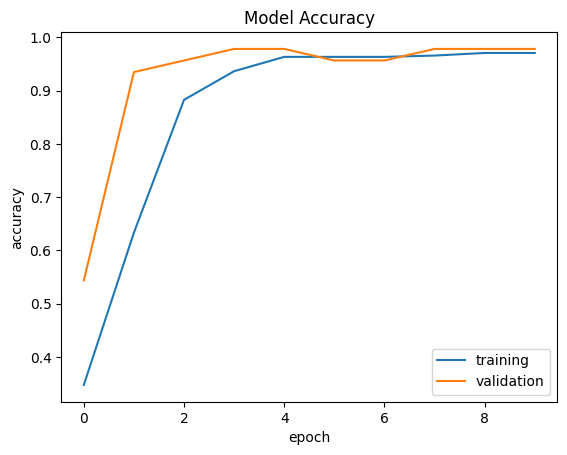

In [ ]:
# look at training data in graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training", "validation"], loc = "lower right")

<ipython-input-27-ce28970c7ad4>:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("training", "validation", loc = "upper right")


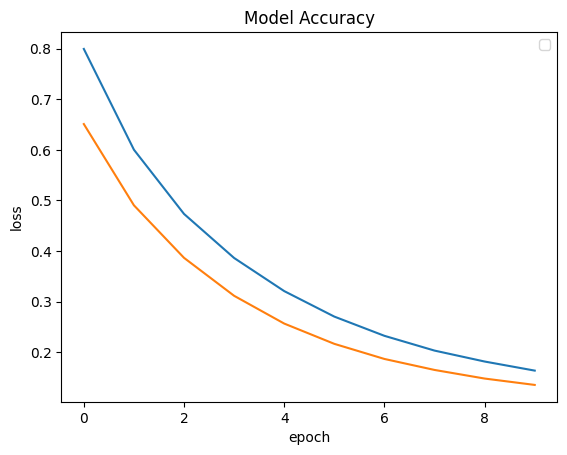

In [ ]:
# look at loss during training in graph
# loss is the difference between the predicted value and actual value
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training", "validation"], loc = "upper right")

## Accuracy on Test Data

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.9649


In [ ]:
print(X_test.shape)
print(X_test[0])

(114, 30)
[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
  0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]


In [ ]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred)
# first num = probability it lands on 0 classification
# second num = probability it lands on 1 classification

(114, 2)
[[0.22194488 0.38476568]
 [0.44326416 0.6402549 ]
 [0.0771794  0.79960376]
 [0.9994878  0.08335868]
 [0.56546146 0.644961  ]
 [0.99774176 0.34801757]
 [0.30451643 0.51356256]
 [0.14118804 0.924825  ]
 [0.23627467 0.7832197 ]
 [0.25527474 0.82250595]
 [0.5216147  0.584821  ]
 [0.20565742 0.7616176 ]
 [0.30276805 0.48292542]
 [0.2938401  0.63448423]
 [0.29485103 0.8177223 ]
 [0.8890952  0.21436748]
 [0.16905355 0.8315875 ]
 [0.14335197 0.61395127]
 [0.2194575  0.78508466]
 [0.99567515 0.64674157]
 [0.62575907 0.6507428 ]
 [0.12788571 0.85672814]
 [0.2015985  0.81604207]
 [0.2084568  0.86802673]
 [0.39948645 0.70428145]
 [0.95769215 0.3444029 ]
 [0.19425158 0.75644934]
 [0.40231743 0.75290596]
 [0.9417364  0.30204245]
 [0.9365583  0.25791124]
 [0.2557718  0.8426314 ]
 [0.31228423 0.7358702 ]
 [0.22721659 0.83836675]
 [0.9998019  0.21681385]
 [0.97449    0.2716943 ]
 [0.25567546 0.7260768 ]
 [0.1199487  0.93416077]
 [0.31493545 0.7603615 ]
 [0.12870114 0.75215906]
 [0.21990375 0.6

In [ ]:
# grab largest value from predictions
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
